In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time
from joblib import dump, load
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [38]:
# file_name=input("Enter File Name with Address :")
ticker = "AAPL"

In [39]:

combined_df = pd.read_csv("Stock_Data/"+ticker+".csv")
date=combined_df['Date']
# Drop the 'Date' column
combined_df_normalized=combined_df.drop(columns=['Date'], inplace=True)

# Separate out the macd_histogram and next_day_macd_histogram columns
macd_histogram = combined_df['macd_histogram']
Next_Day_macd_histogram = combined_df['Next_Day_macd_histogram']
combined_df.drop(columns=['macd_histogram', 'Next_Day_macd_histogram'], inplace=True)

# Normalize numerical columns excluding macd_histogram and next_day_macd_histogram
scaler = MinMaxScaler()
combined_df_normalized = scaler.fit_transform(combined_df.select_dtypes(include=['float64', 'int64']))

# Convert normalized array back to DataFrame
combined_df_normalized = pd.DataFrame(combined_df_normalized, columns=combined_df.select_dtypes(include=['float64', 'int64']).columns)

# Concatenate normalized DataFrame with macd_histogram and next_day_macd_histogram
combined_df_normalized['macd_histogram'] = macd_histogram.values
combined_df_normalized['Next_Day_macd_histogram'] = Next_Day_macd_histogram.values

# Display the normalized combined dataframe
display(combined_df_normalized.head())


,Open,High,Low,Close,Adj Close,Volume,sma_50,ema_50,sma_200,ema_200,rsi,macd,signal,Next_Day_Close,Next_Day_rsi,macd_histogram,Next_Day_macd_histogram
0,0.242189,0.265414,0.260744,0.294568,0.275913,0.359081,0.170392,0.140239,0.000000,0.000000,0.621892,0.438200,0.372543,0.324805,0.651043,0.560030,0.827646
1,0.291626,0.297843,0.307291,0.324805,0.305483,0.305341,0.171488,0.143248,0.002216,0.002727,0.651043,0.473980,0.390086,0.331646,0.715527,0.827646,0.994980
2,0.315095,0.305915,0.328848,0.331646,0.312174,0.200546,0.172992,0.146523,0.004306,0.005568,0.715527,0.505353,0.411175,0.334656,0.697203,0.994980,1.070549
3,0.316623,0.304384,0.325415,0.334656,0.315117,0.218064,0.174479,0.149837,0.006927,0.008438,0.697203,0.531231,0.433866,0.323847,0.839529,1.070549,1.017745
4,0.328843,0.311900,0.335988,0.323847,0.304547,0.203257,0.174397,0.152416,0.008962,0.011035,0.839529,0.546435,0.455438,0.323163,0.801822,1.017745,0.932152


In [40]:
from joblib import load

# Load the models
close_model = load('models/Next_Day_Close_Linear Regression.joblib')
pca = load('models/pca_model.joblib')

# Print confirmation
print('Models loaded successfully!')


Models loaded successfully!


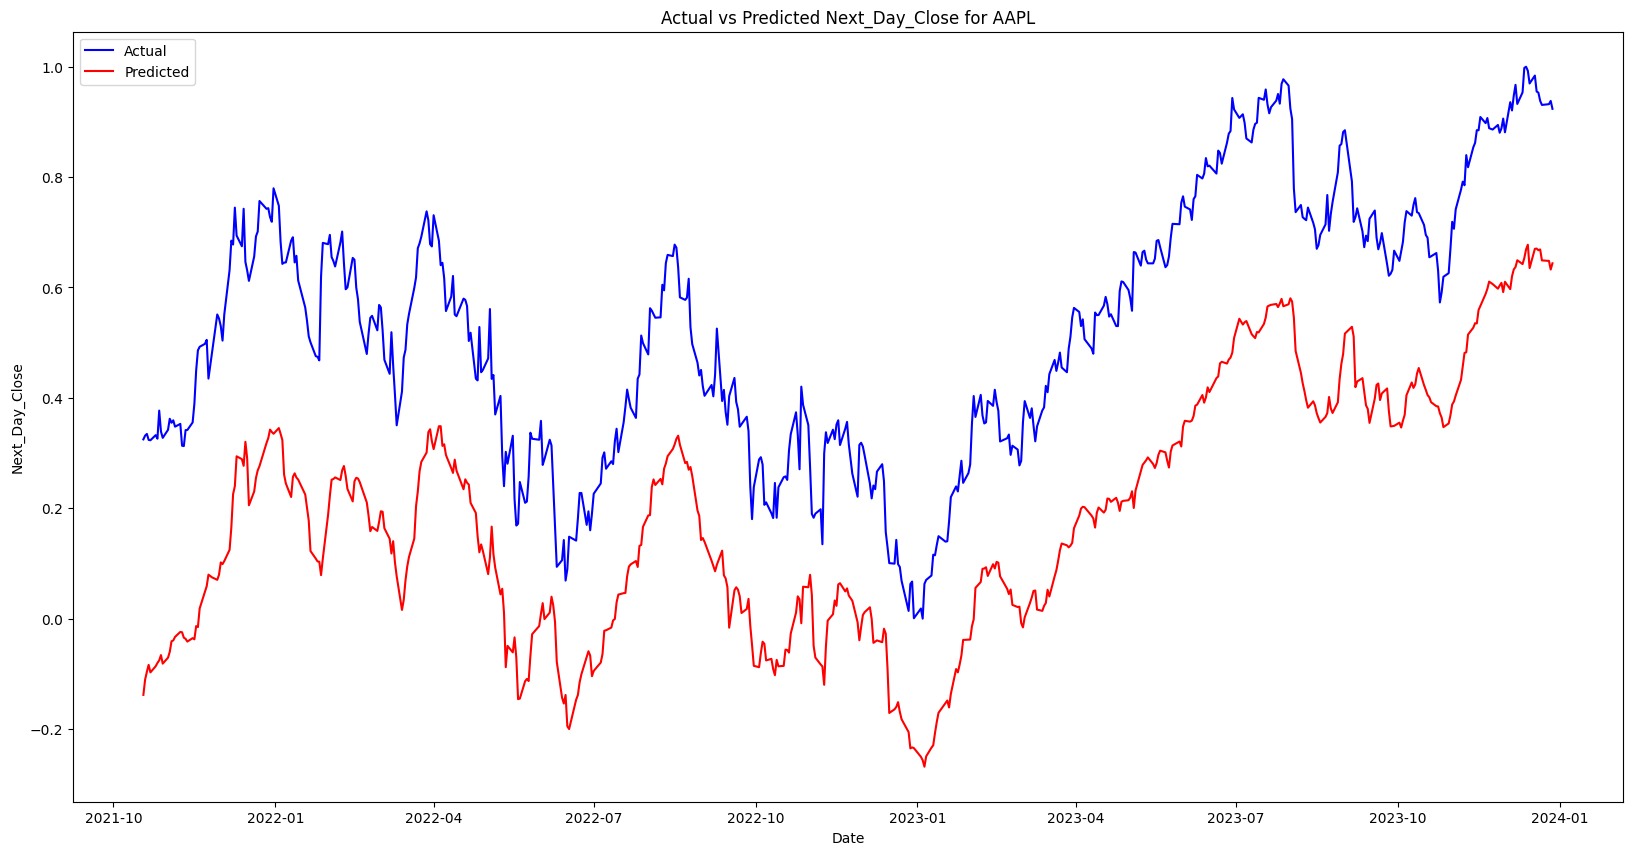

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Copy the normalized DataFrame for predictions
predictions_df = combined_df_normalized[['Next_Day_Close']].copy()

# Check if 'date' is defined or should be derived from the DataFrame
# Ensure 'date' has the correct length
predictions_df['date'] = pd.to_datetime(date)
# Separate features and target variable
y = combined_df_normalized['Next_Day_Close']
X = combined_df_normalized.drop(['Next_Day_Close', 'Next_Day_rsi', 'Next_Day_macd_histogram'], axis=1)

# Apply PCA
X_pca = pca.fit_transform(X)  # Use transform if pca is already fitted

# Make predictions
predictions_df['pred_Next_Day_Close'] = close_model.predict(X_pca)

# Plotting the Line graphs of predicted vs actual data
plt.figure(figsize=(20, 10))
plt.plot(predictions_df['date'], predictions_df['Next_Day_Close'], label='Actual', color='blue')
plt.plot(predictions_df['date'], predictions_df['pred_Next_Day_Close'], label='Predicted', color='red')
plt.title('Actual vs Predicted Next_Day_Close for '+ticker)
plt.xlabel('Date')
plt.ylabel('Next_Day_Close')
plt.legend()
plt.show()
